# Projet 02
###### Date de soutenance : 19/10/2020
###### Nom: Blohorn
###### Prénom: Agar

## Analysez des données de systèmes éducatifs


### Problématique :  
Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.

### Objectif : 
Expansion à l'international de l'entreprise Academy pour favoriser l'éducation en ligne partout dans le monde
   - Quels sont les pays avec un fort potentiel client pour nos services
   - Pour chacun de ces pays, quels sera l'évolution de ces potentiels de clients
   - Dans quel pays l'entreprise doit elle opérer en priorité ?

    
   
### Missions : 
- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant -  des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

### Compétences évaluées : 

- Utiliser un notebook Jupyter pour faciliter la rédaction du code et la collaboration
- Maîtriser les opérations fondamentales du langage Python pour la Data Science
- Mettre en place un environnement Python
- Manipuler des données avec des librairies Python spécialisées
- Effectuer une représentation graphique à l'aide d'une librairie Python adaptée

In [114]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
import geopandas as gpd
from datetime import datetime
import os
# shapefile est le fichier contenant les formes des pays en polygones avec les codes des pays associés
shapefile = os.path.expanduser('~/Documents/Projet Openclassrooms/Projet 2/Projet+Python_Dataset_Edstats_csv/10m_cultural/10m_cultural/ne_10m_admin_0_countries_lakes.shp')
# Je lis ce fichier avec le module geopandas ce qui me permettras d'afficher une carte selon mes données
gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')

In [115]:
# options pandas pour lire entièrement les fichiers au moins jusqu'à 999 lignes et 999 colonnes
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [116]:
# importation des fichiers de données
Country       = pd.read_csv("EdStatsCountry.csv", sep=',')
CountrySeries = pd.read_csv("EdStatsCountry-Series.csv", sep=',')
data          = pd.read_csv("EdStatsData.csv", sep=',')
FootNote      = pd.read_csv("EdStatsFootNote.csv", sep=',')
series        = pd.read_csv("EdStatsSeries.csv", sep=',')

## Description des données de la Banque mondiale

### Fichier EdStatsCountry.csv

In [4]:
Country.shape

(241, 32)

In [5]:
Country.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [6]:
Country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [7]:
#Country.sample(5)

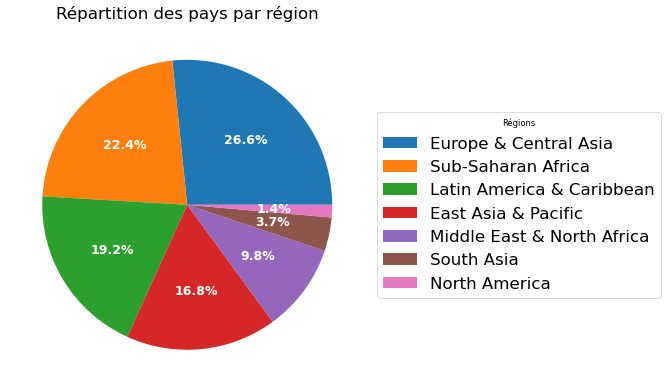

In [8]:


fig = plt.figure(figsize=(16, 8), dpi= 60, facecolor='w', edgecolor='k')
ax = plt.subplot(1,1, 1)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

wedges, texts, autotexts = ax.pie(Country['Region'].value_counts(),
                                   autopct=lambda pct: func(pct, Country['Region'].value_counts())
                                   ,textprops=dict(color="w"))

ax.legend(wedges, Country['Region'].value_counts().index,
          title="Régions",
          loc="center left",
          fontsize = 20,
           bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Répartition des pays par région', fontsize = 20)

plt.setp(autotexts, size=15, weight="bold")

plt.show()


Les pays majoritaires sont concentrés dans 3 régions principales : Afrique Sub Saharienne, L'Europe et l'Asie centrale ainsi que l'Amérique Latine et les Carraibes. Dataviz issu de : https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py

In [9]:
Country['Income Group'].value_counts()

Upper middle income     55
Lower middle income     50
High income: nonOECD    44
Low income              34
High income: OECD       31
Name: Income Group, dtype: int64

Text(0.5, 1.0, 'Répartition du nombre de pays suivant leur revenu')

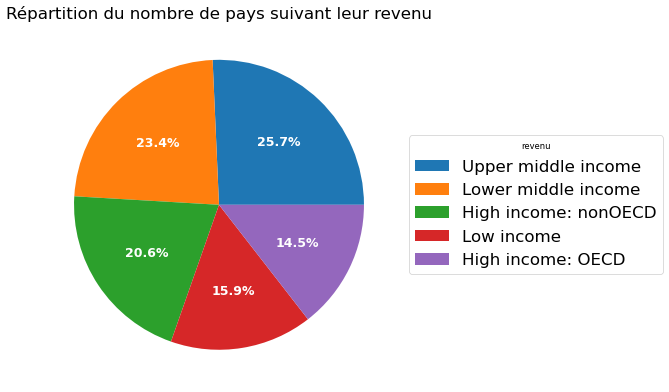

In [10]:
fig = plt.figure(figsize=(16, 8), dpi= 60, facecolor='w', edgecolor='k')
ax = plt.subplot(1,1, 1)
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

wedges, texts, autotexts = ax.pie(Country["Income Group"].value_counts(normalize=True), autopct=lambda pct: func(pct, Country["Income Group"].value_counts(normalize=True)),
                                  textprops=dict(color="w"))

ax.legend(wedges, Country["Income Group"].value_counts(normalize=True).index,
          title="revenu",
          loc="center left",
          fontsize = 20,
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=15, weight="bold")

ax.set_title("Répartition du nombre de pays suivant leur revenu", fontsize = 20)

La répartition des pays dans chacun des groupe de revenu est plutôt bien équilibrée

In [11]:
Country.size

7712

In [12]:
round(Country.isna().sum().sum()/Country.size * 100,0) # 31% de valeurs manquantes

31.0

In [13]:
Country[Country['Region'].isna()].shape[0] # 27  régions manquantes valeurs NAN

27

**Organisation du fichier EdStatsCountry.csv :** 

EdStatsCountry est un jeu de donnée composé de 241 lignes et 32 colonnes.Il comprend 7712 cellules dont 31% sont des valeurs manquantes. 

**Description :** 

Il décrit grâce à quelques indicateurs la situation économique des pays.Il y aussi des térritoires comme le Gibraltar ( territoire britannique d'outre-mer) ou des régions comme l'Amérique latine et CaraÏbes dont il n y a pas d'informations sur leur situation économique. Cette liste géographiques est divisée selon leur revenus (revenu moyen supérieur , revenu moyen inférieur, revenu élevé faisant partie de l'OECD (Organisation de coopérations et de développement Cumulative), revenu élevé ne faisant pas partie de l'OECD, revenu faible) 

### Fichier EdStatsCoutrySeries.csv

In [14]:
CountrySeries.columns

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')

In [15]:
CountrySeries.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [16]:
#CountrySeries.sample(5)

In [17]:
CountrySeries.size

2452

In [18]:
CountrySeries['CountryCode'].nunique() # 211 pays pris en compte dans ces jeux de données

211

In [19]:
round(CountrySeries.isna().sum().sum()/CountrySeries.size * 100,0) # 25% de valeurs manquantes

25.0

**Organisation du fichier EdStatsCountryseries.csv :** 

Il est composé de 613 lignes et 4 colonnes dont une colonne est entièrement rempli de valeurs manquantes, celle de Unnamed ce qui nous amène a 25% de valeurs manquantes.

**Descritpion du fichier :**

EdStatsCountryseries donne les sources sur les SeriesCode qui sont des diminutifs des différents indicateurs économiques d'un pays. 

### Fichier EdStatsData.csv

In [20]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [21]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# data.sample(5)

In [23]:
data["Indicator Name"].nunique()

3665

In [24]:
data.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,8.912200e+04,3.877700e+04,3.751100e+04,3.846000e+04,3.860600e+04,9.029600e+04,3.937200e+04,3.864100e+04,3.855200e+04,3.754000e+04,1.244050e+05,7.443700e+04,7.554300e+04,7.579300e+04,7.746200e+04,1.313610e+05,7.680700e+04,7.345300e+04,8.491400e+04,1.188390e+05,1.766760e+05,1.235090e+05,1.242050e+05,1.303630e+05,1.288140e+05,1.841080e+05,1.403120e+05,1.372720e+05,1.343870e+05,1.421080e+05,2.424420e+05,1.460120e+05,1.472640e+05,1.375090e+05,1.137890e+05,1.310580e+05,1.646000e+04,143.000000,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,3.283898e+09,7.664969e+09,7.913722e+09,7.856908e+09,8.118002e+09,3.622763e+09,9.156550e+09,1.014901e+10,1.104709e+10,1.195436e+10,9.084424e+09,1.571674e+10,1.604668e+10,1.643532e+10,1.684022e+10,1.052543e+10,1.874630e+10,2.027385e+10,1.794678e+10,1.331558e+10,9.423384e+09,1.384867e+10,1.428299e+10,1.449393e+10,1.589729e+10,1.188637e+10,1.684674e+10,1.872300e+10,2.029794e+10,1.894907e+10,1.189592e+10,2.117911e+10,2.176323e+10,2.425332e+10,2.678449e+10,2.353720e+10,1.934411e+11,2.160839,5.780697e+02,6.054774e+02,6.315916e+02,6.556516e+02,6.751516e+02,6.911287e+02,7.040640e+02,7.145788e+02,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,1.780774e+11,2.744142e+11,2.790549e+11,2.823809e+11,2.940635e+11,2.002929e+11,3.264675e+11,3.535351e+11,3.804257e+11,4.014873e+11,3.665667e+11,4.881357e+11,5.012055e+11,5.121962e+11,5.292982e+11,4.285218e+11,5.812586e+11,6.142357e+11,5.859148e+11,5.153472e+11,4.442374e+11,5.449242e+11,5.622886e+11,5.803607e+11,6.278337e+11,5.576181e+11,6.851484e+11,7.465688e+11,7.944132e+11,7.623650e+11,6.218710e+11,8.555853e+11,8.833955e+11,9.513016e+11,1.023180e+12,9.732465e+11,2.839188e+12,0.810584,1.475072e+04,1.577305e+04,1.678556e+04,1.778666e+04,1.874408e+04,1.965409e+04,2.052941e+04,2.136851e+04,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,-1.404240e+00,-1.478345e+00,-2.358765e+00,-2.867273e+00,-2.800548e+00,-2.216315e+00,-1.556722e+00,-1.410886e+00,-1.425202e+00,-1.562425e+00,-1.803750e+00,-5.814339e+00,-5.089333e+00,-6.184857e+00,-4.792691e+00,-2.697722e+00,-3.820174e+00,-2.517245e+00,-6.086200e+04,-6.526000e+04,-6.759300e+04,-6.973700e+04,-9.214300e+04,-1.111860e+05,-1.262600e+05,-1.347240e+05,-3.708940e+05,-3.882170e+05,-4.088540e+05,-4.561240e+05,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00,-1.797539e+00,1.000000,-1.870000e+00,-2.000000e+00,-2.110000e+00,-2.150000e+00,-2.140000e+00,-2.090000e+00,-1.980000e+00,-1.830000e+00,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,1.770000e+00,9.468690e+00,9.989330e+00,9.581825e+00,9.068048e+0

In [25]:
data.shape

(886930, 70)

In [26]:
round(data.isna().sum().sum()/data.size * 100,0)

86.0

**Organisation du fichier:**

EDstatsData est composé de 886930 lignes et 70 colonnes, 86% de valeurs manquantes.

**Description du fichier:**

Il comprend 70 colonnes dont les quatres premiers sont respectivement: Nom du pays ou régions, le code du pays, le nom de l'indicateur et le code de l'indicateur. Les 66 colonnes restantes correspondent au années de 1970 à 2100.

Ce fichier correspond à l'évolutions des différents indicateurs d'educations par pays par rapport aux temps (en année).


### Fichier EdStatsFootNote.csv

In [27]:
FootNote.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')

In [28]:
FootNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [29]:
#FootNote.sample(5)

In [30]:
FootNote.shape

(643638, 5)

In [31]:
round(FootNote.isna().sum().sum()/FootNote.size * 100,0)

20.0

**Organisation du fichier EdFootnote.csv :**

EdFootNote.csv est fichier composé de 643638 lignes et 5 colonnes dont 20% de valeurs manquantes

**Description du fichier :**

Ce fichier indique les sources des différents indicateurs d'éducation des pays. Plusieurs indicateurs statistiques pour un même pays trouvé avec des sources différentes.


### Fichier EdStatsSeries.csv

In [32]:
series.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [33]:
series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#series.sample(5)

In [35]:
series.shape

(3665, 21)

In [36]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [37]:
round(series.isna().sum().sum()/series.size * 100,0)

72.0

**Organisation du fichier EdstatSeries.csv :** 

EdstatSeries est un fichier de 3665 lignes et 21 colonnes dont 72% sont des valeurs manquantes. 

**Description du fichier :** 

Il présente les codes et les définitions des noms des indicateurs de niveaux d'instructions selon le niveau d'éducation. 

## Choix des indicateurs pertinents de point de vue de la problématique d'Academy

Academy a besoin de connaitre les pays dans lesquels implanter le e-learning au vue de la réussite de l'entreprise. Il faudrait pour cela que la population :

 - ait les moyens de payer la formation (GDP at market prices (current US$), GDP per capita (current US$)), Government expenditure on education as % of GDP(%)) 
 - ait les moyens d'avoir accès à internet (Internet users(per 100 people)
 - ait les moyens d'avoir un ordinateur (Personal computers (per 100 people)
 - soit suffisamment jeune et ambitieux pour avoir besoin de formations  (Population, ages 15-24 total)
 
J'ai pris en compte également l'importance que donne le gouvernement à l'éducation dans le pays (Expenditure on education as % of total government expenditure (%), Government expenditure on education as % of GDP(%))
  
  Voici la liste des indicateurs choisis:

- Gross enrolment ratio, lower secondary , both sexes(%)
- Gross graduation ratio, lower secondary, both sexes(%)
- Population, ages 15-24 total-
- Personal computers (per 100 people)
- Internet users(per 100 people)
- GDP at market prices (current US$)
- GDP per capita (current US$)
- Expenditure on education as % of total government expenditure (%)
- Government expenditure on education as % of GDP(%)
- Enrolment in tertiary education, all programmes, both sexes (number)
- Enrolment in upper secondary education, both sexes (number)    



In [38]:
# trouver un indicateur
series[series['Indicator Name'].str.contains('GDP per capita (current US$) ')]

C:\Users\agar.blohorn\anaconda3\envs\geo_env\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20


## Exploration de données sur la base des indicateurs choisis

### Nettoyage des ensembles de données selon les indicateurs choisie, la tranche d'années utiles et les pays choisis

In [117]:
#Liste des pays présents dans le fichier CountrySeries et Country => 211 pays en tous
PaysValide = Country.loc[Country["Country Code"].isin(CountrySeries['CountryCode'].unique().tolist()),'Short Name'].tolist()
RegionValide = Country['Region'].dropna().unique().tolist()

In [118]:
#Liste des années de 1970 à 2100
annees = list(map(str,range(1970,2100,1)))

In [119]:
# Fonction permettant de recupérer un indicateur pour un niveau donnée (Pays, Region, etc..)
# Elle permet egalement de rajouter les colonnes Region, Income group au dataset de sortie
def recup_indicateur(dataset, niveau,indicateur):
    if niveau == 'Region':
        checklist = RegionValide
    else:
        checklist = PaysValide
    tab = dataset[dataset['Country Name'].isin(checklist)]
    ColonneAnnee = [yy for yy in annees if yy in dataset.columns]
        
    # On supprime toutes les lignes dont toutes la valeurs sont à NaN sur la base des colonnes de subset
    # On supprime les colonnes dont toutes la valeurs sont à NaN
    tab = tab.loc[tab['Indicator Name'] == indicateur].dropna(how = 'all', subset=ColonneAnnee).dropna(axis=1,how='all')
    #Rajout des colonnes utiles à l'analyse
    if (not tab.empty):
        tab = tab.drop(['Indicator Code'], axis=1)
        tab1 = Country[['Country Code', 'Region','Income Group']]
        newTab = tab1.merge(tab,on='Country Code')
    return newTab

### Indicateur Taux de scolarisation au lycée

In [42]:

#on extrait l'indicateur grâce à la fonction recup_indicteur
TauxScolarisationpParPays = recup_indicateur(data, 'Country Name','Gross enrolment ratio, lower secondary, both sexes (%)')
# on supprime les valeurs NAN de la colonne 2015 pour afficher sa distribution


In [43]:
DistTauxScol = TauxScolarisationpParPays['2015'].dropna()

<Figure size 720x648 with 0 Axes>

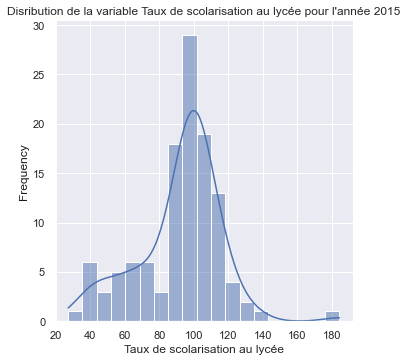

In [44]:
plt.figure(figsize=(10,9))
sns.set()
sns.displot(DistTauxScol, kde = True)
plt.xlabel('Taux de scolarisation au lycée')
plt.ylabel('Frequency', c='k')
plt.title("Disribution de la variable Taux de scolarisation au lycée pour l'année 2015")
plt.show()

In [45]:
# mesure d'asymétrie
skew(DistTauxScol, bias = False)

-0.32157494272021175

In [46]:
# mesure d'applatissement
kurtosis(DistTauxScol, bias = False)

1.5955157356192284

La distribution de Taux de scolarisation au lycée présente une mesure d'asymétrie légèrement négative et une mesure d'applatissement largement supérieure à 0

In [47]:
# On extrait uniquement les colonnes entre 2000 et 2016, données utiles et récentes et on supprime les Nan
BoxTauxScol = TauxScolarisationpParPays.loc[:,'2000':'2016'].dropna()

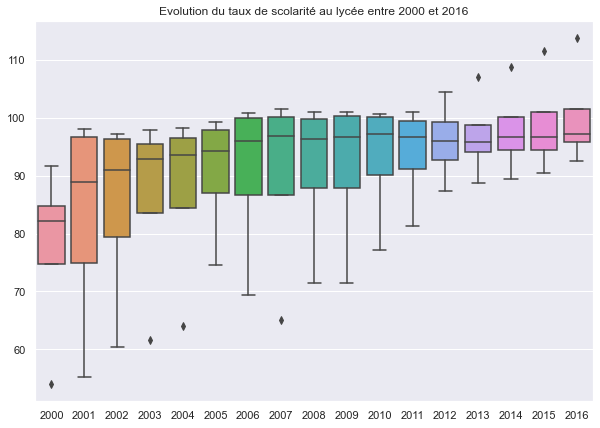

In [48]:
plt.figure(figsize=(10,7))
sns.set()
sns.boxplot(data = BoxTauxScol)
plt.title("Evolution du taux de scolarité au lycée entre 2000 et 2016")
plt.show()

On peux remarquer que le taux de scolarité a augmenté entre 2000 et 2003 avec de fortes disparités dans le monde puis s'est stabilisé à partir de 2003. On peut ajouter que les dipsarités entre pays diminuent à partir de 2011.

In [49]:
# préliminaire afin d'afficher le taux de scolarisation en fonction des revenues des pays
# on range les dates dans une liste de 1990 à 2016
Col_AgrG = list(map(str,range(1990,2016,1)))
# on ajoute a cette liste Income Group
Col_AgrG.append('Income Group')
# la somme du taux de scolarité de tous les pays selon les revenus par année
TauxScolIncomeGroup = TauxScolarisationpParPays[Col_AgrG].groupby(['Income Group']).mean()
# on place Income group au début du dataframe
TauxScolIncomeGroup.reset_index(level=0, inplace=True)
TauxScolIncomeGroup

,Income Group,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,High income: OECD,NaN,92.981483,94.484680,109.423178,110.304173,109.767469,107.979671,104.438057,103.316136,104.540165,105.581277,106.520855,107.297612,108.264214,105.748678,105.865695,105.369374,104.412494,104.542357,104.387974,105.576901,105.818930,106.182017,110.044526,110.608836,112.326172
1,High income: nonOECD,75.559359,77.385035,80.535690,83.410995,85.275627,91.772150,94.317713,92.929496,92.053943,93.648348,94.932762,94.937188,96.553783,101.267303,102.599391,97.141048,100.862738,101.356662,104.141365,102.664216,101.353362,97.128642,95.494551,99.744716,101.767060,97.923764
2,Low income,NaN,27.843635,12.266300,44.214161,20.302310,20.647985,20.289075,16.669543,32.412450,33.919345,35.357346,32.710487,37.074351,39.415065,38.905139,41.241846,42.519098,42.841070,46.082149,46.621845,48.586319,50.212119,52.888913,56.751814,56.549611,59.520010
3,Lower middle income,NaN,90.768143,84.993843,75.941788,63.271099,61.632543,52.726370,52.016388,54.445629,61.776301,60.436228,66.050510,65.965576,73.535860,69.832679,72.173188,72.297184,75.715602,74.882611,77.929033,79.888154,78.778658,79.410002,78.650773,85.061177,84.567776
4,Upper middle income,NaN,NaN,NaN,91.435921,77.834334,83.147749,85.408748,82.268966,84.100632,86.704304,87.655350,91.174314,92.479987,96.973194,96.481776,97.400939,98.315902,98.533948,99.187268,100.346626,99.978485,100.253671,100.027968,101.234291,101.340549,100.884054


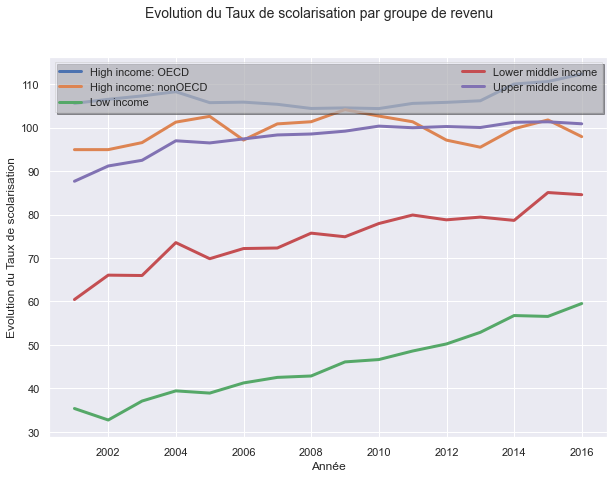

In [50]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Evolution du Taux de scolarisation par groupe de revenu", fontsize  = 14)
# on convertit les dates en datetime
Date_Deb = datetime.strptime('2000-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2015-12-31','%Y-%m-%d')
# on stocke les dates dans une liste nommée années_ref
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')
# on parcours la liste des Income group de 1990 à 2015 et on trace l'évolution du taux de scolarité
for IG in TauxScolIncomeGroup['Income Group'].to_list():
    Scol = TauxScolIncomeGroup[TauxScolIncomeGroup['Income Group']==IG].loc[:,'2000':'2015']
    plt.plot(annees_ref,Scol.T,linewidth = 3.0, label=IG)
    
#plt.ylim(0,100)

plt.xlabel('Année')
plt.ylabel('Evolution du Taux de scolarisation')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

Sur ce graphique, on peut remarquer que les pays ayant un haut revenu et particulierement ceux qui appartiennent à l'organisation OECD possède le taux de scolarisation le plus élevée. En moyenne, au fil des années, le taux de scolarisation augmente les revenus supérieur, moyen et faible. 

### Indicateur Taux de diplomée au lycee

In [51]:
TauxDiplome = recup_indicateur(data, 'country','Gross graduation ratio from lower secondary education, both sexes (%)')
TDA = TauxDiplome["2014"].dropna()

<Figure size 720x504 with 0 Axes>

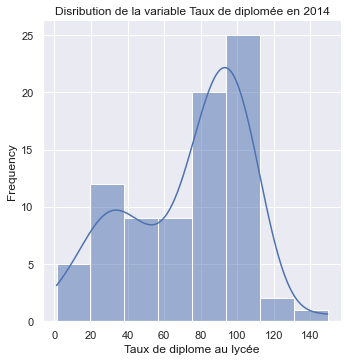

In [52]:
plt.figure(figsize=(10,7))
sns.set()
sns.displot(TDA, kde = True)
plt.xlabel('Taux de diplome au lycée', c='k')
plt.ylabel('Frequency', c='k')
plt.title("Disribution de la variable Taux de diplomée en 2014", c='k')
plt.show()

In [53]:
skew(TDA)

-0.5320414573592306

In [54]:
kurtosis(TDA)

-0.6278854600914463

La distribution du taux de diplomée en 2014 présente une mesure d'asymétrie négative et une mesure d'applatissement négatif ce qui nous amène a une queue a droite 

In [55]:
TriDA = TauxDiplome[["Region", "Country Name", "2014"]]
TriDA = TriDA.sort_values(by = "2014", ascending = False)

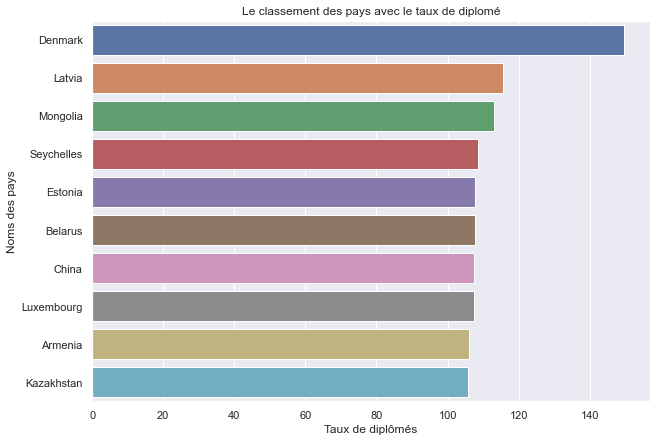

In [56]:
PaysPrem = TriDA.head(10)
plt.figure(figsize = (10,7))
sns.barplot(data = PaysPrem, x="2014", y = "Country Name")
plt.xlabel("Taux de diplômés")
plt.ylabel("Noms des pays")
plt.title("Le classement des pays avec le taux de diplomé")
plt.show()

Beaucoup de pays d'Europe et d'Asie centrale présente un nombre élevé de diplômée, on y trouve aussi la mongolie et Seychelles et la Chine qui ont de trés bon score.

### Indicateur population totale entre 15-24 ans

In [57]:
indicateur = 'Population, ages 15-24, total'
pop1524TotalByCountry = recup_indicateur(data,'country',indicateur) 


In [58]:
# on supprime les lignes présentant des valeurs manquantes
pop1524TotalByCountry = pop1524TotalByCountry.dropna(how='any')
TJA = pop1524TotalByCountry["2014"].dropna()
pop1524TotalByCountry.sample(3)

,Country Code,Region,Income Group,Country Name,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
166,URY,Latin America & Caribbean,High income: nonOECD,Uruguay,"Population, ages 15-24, total",489108.0,497700.0,507459.0,517256.0,525601.0,531422.0,534427.0,534923.0,533200.0,529787.0,525193.0,519269.0,512182.0,505160.0,499788.0,497149.0,497785.0,501263.0,506477.0,511783.0,515960.0,518707.0,520300.0,520793.0,520399.0,519298.0
149,SWE,Europe & Central Asia,High income: OECD,Sweden,"Population, ages 15-24, total",1171630.0,1161416.0,1147169.0,1129915.0,1111121.0,1092131.0,1072958.0,1054116.0,1038052.0,1027823.0,1025503.0,1031632.0,1045283.0,1065109.0,1089029.0,1115092.0,1143486.0,1173455.0,1200954.0,1220852.0,1229643.0,1225872.0,1210950.0,1187910.0,1161310.0,1134811.0
55,FRA,Europe & Central Asia,High income: OECD,France,"Population, ages 15-24, total",8516730.0,8429131.0,8313465.0,8182590.0,8054577.0,7943067.0,7850995.0,7776167.0,7720623.0,7685310.0,7669903.0,7677498.0,7706168.0,7744162.0,7775493.0,7788836.0,7780124.0,7753063.0,7713805.0,7672082.0,7635485.0,7604177.0,7576981.0,7558568.0,7554426.0,7567872.0


<Figure size 720x504 with 0 Axes>

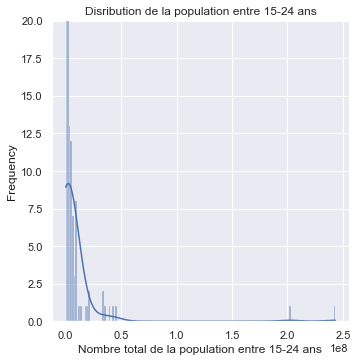

In [59]:
plt.figure(figsize=(10,7))
sns.set()
sns.displot(TJA, kde=True)
plt.xlabel('Nombre total de la population entre 15-24 ans')
plt.ylabel('Frequency', c='k')

plt.ylim(0,20)

plt.title("Disribution de la population entre 15-24 ans")
plt.show()

In [60]:
skew(TJA, bias = False)

7.927243702905218

In [61]:
kurtosis(TJA, bias = False)

67.3904425786513

La distribution du nombre total de la population entre 15-24 ans présente une mesure d'asymétrie trés positive et une mesure d'aplatissement trés elevée. On peux en déduire un fort écart entre les pays pour cet indicateur.

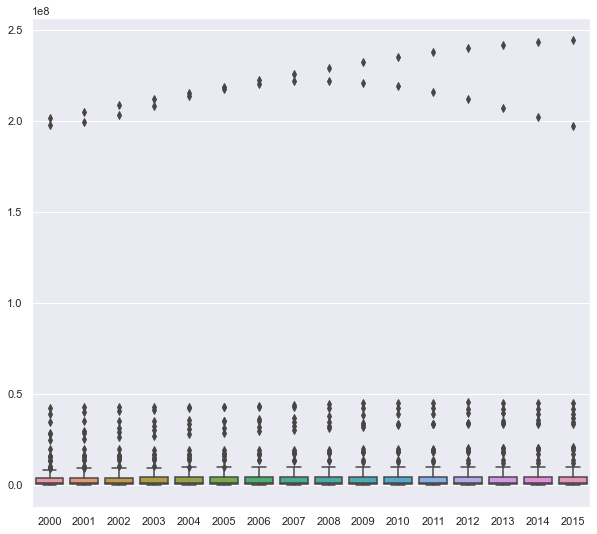

In [62]:
BoxPopJeune = pop1524TotalByCountry.loc[:,'2000':'2015'].dropna()
plt.figure(figsize=(10,9))
sns.set()
sns.boxplot(data = BoxPopJeune)
plt.show()

La figure ci-dessus présente deux points qui représente deux pays dont le nombre total de jeune entre 15 et 24 ans et largement supérieur à ceux des autres pays. Ce sont deux points trés atypiques.

In [63]:
TriPopJeune = pop1524TotalByCountry[["Region", "Country Name","2015"]]


In [64]:
TriPopJeune = TriPopJeune.sort_values(by = "2015", ascending = False)
TriPopJeune

,Region,Country Name,2015
73,South Asia,India,244120201.0
32,East Asia & Pacific,China,197026759.0
167,North America,United States,45147517.0
72,East Asia & Pacific,Indonesia,41819264.0
125,South Asia,Pakistan,39080811.0
118,Sub-Saharan Africa,Nigeria,36659023.0
16,South Asia,Bangladesh,34400594.0
24,Latin America & Caribbean,Brazil,33595574.0
52,Sub-Saharan Africa,Ethiopia,21074230.0
105,Latin America & Caribbean,Mexico,20336734.0


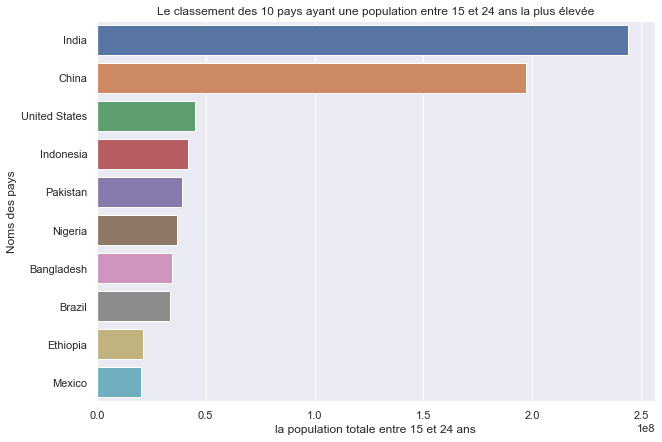

In [65]:
PaysPrem = TriPopJeune.head(10)
plt.figure(figsize = (10,7))
sns.barplot(data = PaysPrem, x="2015", y = "Country Name")
plt.xlabel("la population totale entre 15 et 24 ans")
plt.ylabel("Noms des pays")
plt.title("Le classement des 10 pays ayant une population entre 15 et 24 ans la plus élevée")
plt.show()

L'Inde et la Chine se démarque des autres pays avec le nombre le plus élvée de jeune entre 15 et 24 ans.
Les pays présentant une population jeune entre 15 et 24 ans sont : Inde, la Chine, les Etats-Unis, l'Indonésie 

In [66]:
donneesnum = pop1524TotalByCountry.drop(['Country Code','Region','Country Name','Indicator Name'],axis=1)
pop1524TotalByCountry['MEAN'] = donneesnum.mean(axis=1)
pop1524TotalByCountry['MEDIAN'] = donneesnum.median(axis=1)
pop1524TotalByCountry['STD'] = donneesnum.std(axis=1)
pop1524TotalByCountry['VARIANCE'] = donneesnum.var(axis=1)
pop1524TotalByCountry['CHANGE'] = 100.0 * ((donneesnum['2015'] - donneesnum['2000'])/donneesnum['2000'])

pop1524TotalByCountry['SKEWNESS'] = donneesnum.skew(axis=1)
pop1524TotalByCountry['KURTOSIS'] = donneesnum.kurtosis(axis=1)

In [67]:
colIdx = ['Country Code','Region','Country Name','MEAN','MEDIAN','STD','VARIANCE','CHANGE']
pop1524TotalByRegion = pop1524TotalByCountry[colIdx].groupby(['Region']).mean()
pop1524TotalByRegion.head()

,MEAN,MEDIAN,STD,VARIANCE,CHANGE
Region,,,,,
East Asia & Pacific,1.547181e+07,1.543227e+07,1.186489e+06,1.121634e+13,14.781914
Europe & Central Asia,2.326730e+06,2.340074e+06,2.117383e+05,1.156222e+11,-8.257562
Latin America & Caribbean,3.274549e+06,3.298791e+06,2.321984e+05,1.971957e+11,9.931883
Middle East & North Africa,1.915354e+06,1.954754e+06,2.705798e+05,1.691674e+11,22.099674
North America,2.264608e+07,2.261289e+07,1.816559e+06,5.921012e+12,10.508578


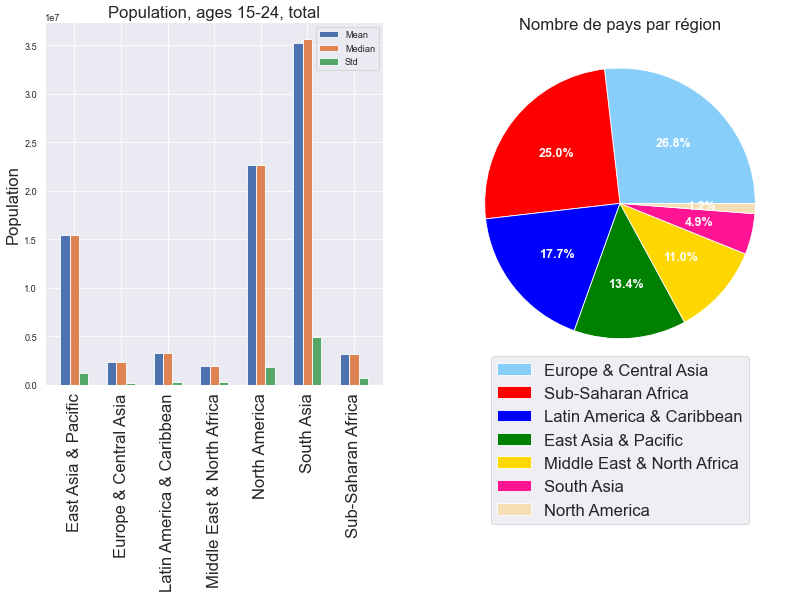

In [68]:
#Ajouts de 3 colonnes : MEAN , MEDIAN , STD
data = pop1524TotalByRegion[['MEAN','MEDIAN','STD']]

width = 0.2
x = np.arange(len(data.index))
#dpi résolution de l'image
fig = plt.figure(figsize=(16, 8), dpi= 60, facecolor='w', edgecolor='k')

ax1 = plt.subplot(1,2, 1)

bar1 = ax1.bar(x - width,data['MEAN'].values,width,label='Mean')
bar2 = ax1.bar(x,data['MEDIAN'].values,width,label='Median')
bar3 = ax1.bar(x + width,data['STD'].values,width,label='Std')

ax1.set_ylabel('Population',fontsize=20)
ax1.set_title('Population, ages 15-24, total',fontsize=20)
ax1.set_xticks(x)
ax1.set_xticklabels(data.index,rotation=90,fontsize=20)
ax1.legend()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','deeppink','wheat']

ax2 = plt.subplot(1,2, 2)

wedges, texts, autotexts = ax2.pie(pop1524TotalByCountry['Region'].value_counts(),
                                   autopct=lambda pct: func(pct, pop1524TotalByCountry['Region'].value_counts())
                                   ,colors=colors,textprops=dict(color="w"))

ax2.legend(wedges, pop1524TotalByCountry['Region'].value_counts().index,
          loc="center",
          fontsize = 20,
          bbox_to_anchor=(0.25, -0.7, 0.5, 1))
ax2.set_title('Nombre de pays par région', fontsize = 20)

plt.setp(autotexts, size=15, weight="bold")

plt.show()

### Indicateur nombre d'élèves inscrit au lycée 

In [77]:
EtudInscritLycee = recup_indicateur(data,'country','Enrolment in upper secondary education, both sexes (number)')
ETL = EtudInscritLycee[["Region", "Country Name", "2007"]].dropna()

### Indicateur du nombre d'élèves inscrit dans le domaine tertiaire 

In [78]:
EtudInscritTer = recup_indicateur(data,'country','Enrolment in tertiary education, all programmes, both sexes (number)')
ETT = EtudInscritTer[["Region", "Country Name", "2007"]].dropna()  

#### Somme des deux indicateurs précédants pour avoir le nombre total de jeune par pays

In [79]:
# je donne des noms de colonne "2007" différents selon les données de nombre de jeune inscrits au lycée ou dans le domaine tertiaire
ETL.rename(columns={'2007': 'Lycee 2007'}, inplace=True)
ETT.rename(columns={'2007': 'Terti 2007'}, inplace=True)

In [80]:
# je fusionne les deux colonnes dans un même dataframe et j'ajoute une colonne qui fait la somme de ces deux colonnes
# pour avoir la population jeune totale
NTJ = ETL.merge(ETT)
NTJ["somme"] = NTJ["Lycee 2007"] + NTJ["Terti 2007"]
NTJ.head(2)

,Region,Country Name,Lycee 2007,Terti 2007,somme
0,Latin America & Caribbean,Aruba,4430.0,2232.0,6662.0
1,Europe & Central Asia,Albania,173269.0,86863.0,260132.0


In [81]:
# je trie les pays ayant le nombre de population jeune de manière décroissante
NTJ.sort_values(by = "somme", ascending = False)

,Region,Country Name,Lycee 2007,Terti 2007,somme
22,East Asia & Pacific,China,42175612.0,25346280.0,67521892.0
47,South Asia,India,40184940.0,14862962.0,55047902.0
104,North America,United States,11729600.0,17758870.0,29488470.0
16,Latin America & Caribbean,Brazil,9073330.0,5272877.0,14346207.0
46,East Asia & Pacific,Indonesia,7213542.0,3806629.0,11020171.0
53,East Asia & Pacific,Japan,3794132.0,4032625.0,7826757.0
66,Latin America & Caribbean,Mexico,3742943.0,2528664.0,6271607.0
101,Europe & Central Asia,Turkey,3032821.0,2453664.0,5486485.0
37,Europe & Central Asia,United Kingdom,3082700.0,2362815.0,5445515.0
11,South Asia,Bangladesh,4144708.0,1145401.0,5290109.0


On remarque que les pays ayant le plus grand nombre d'élèves au Lycée et dans le tertiaire sont la Chine et l'Inde ce qui coincide avec les résultats de l'indicateur "population totale entre 15-24 ans".

### Indicateur Ordinateurs par personnes ( 100 personnes)

In [82]:
PopulationOrdinateur = recup_indicateur(data, 'country', 'Personal computers (per 100 people)')

<Figure size 720x504 with 0 Axes>

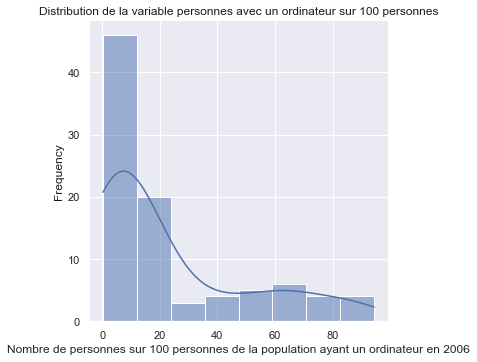

In [83]:
plt.figure(figsize = (10,7))
PopulationOrdinateur = recup_indicateur(data, 'country', 'Personal computers (per 100 people)')
PO = PopulationOrdinateur["2006"].dropna()
sns.set()
sns.displot(PO, kde = True)
plt.xlabel('Nombre de personnes sur 100 personnes de la population ayant un ordinateur en 2006')
plt.ylabel('Frequency', c='k')
plt.title("Distribution de la variable personnes avec un ordinateur sur 100 personnes", c= 'k')
plt.show()

In [84]:
skew(PO, bias = False)

1.2826792727182499

In [85]:
kurtosis(PO, bias = False)

0.3810636968443828

La distribution ci-dessus présente une queue à doite avec une mesure d'asymétrie positive et un coefficient d'applatissement positif.

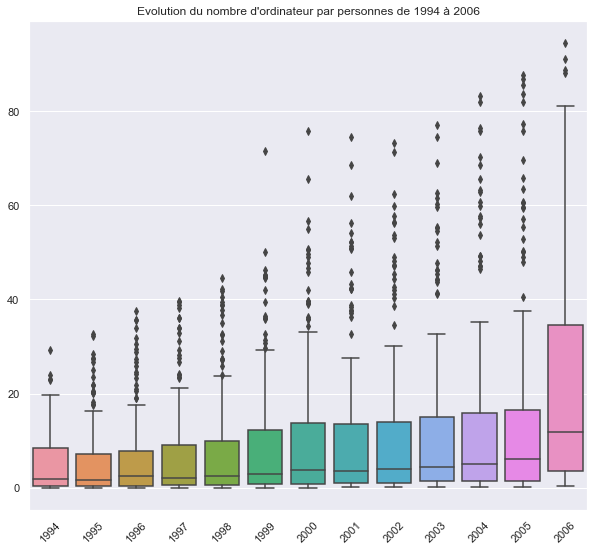

In [86]:
plt.figure(figsize=(10,9))
sns.set()
data_utile = PopulationOrdinateur.loc[:,'1994':'2006']
ax = sns.boxplot(data = data_utile)
plt.title("Evolution du nombre d'ordinateur par personnes de 1994 à 2006")
ax.set_xticklabels(data_utile.columns,rotation=45)
plt.show()

On remarque une augmentation importante du nombre de populations possédant un ordinateur au fil des années avec des disparités qui augmente aussi avec le temps

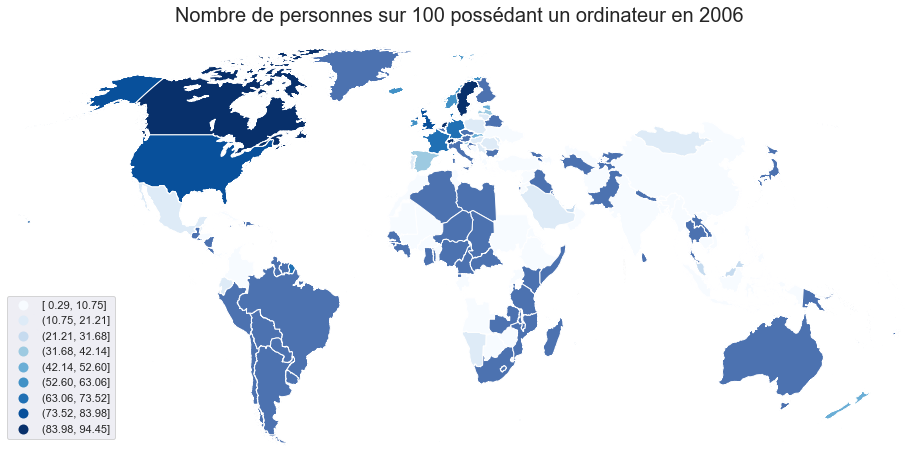

In [87]:
PoMap = PopulationOrdinateur.loc[:,['Region','Country Name', 'Country Code','2006']] 
# je fusionne le fichier shapefile avec PoMap
merged = gdf.merge(PoMap,left_on='ADM0_A3', right_on='Country Code')
merged
colors = 9
cmap = 'Blues'
figsize = (16, 40)
year = '2006'
cols = ['Region','Country Name', 'Country Code', year]
title = 'Nombre de personnes sur 100 possédant un ordinateur en {}'.format(year)
imgfile = 'img/{}.png'.format(title)
ax = merged.dropna().plot(column=year, cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)
merged[merged.isna().any(axis=1)].plot(ax=ax)

ax.set_title(title, fontdict={'fontsize': 20}, loc='center')
##ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')

ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])
ax.get_legend().set_bbox_to_anchor((.12, .4))
##ax.get_figure()

In [88]:
TriPopOrdi = PopulationOrdinateur[["Region", "Country Name", "2006"]]
TriPopOrdi = TriPopOrdi.sort_values(by = "2006", ascending = False)
TriPopOrdi

,Region,Country Name,2006
28,North America,Canada,94.446705
118,Europe & Central Asia,Netherlands,90.987849
29,Europe & Central Asia,Switzerland,88.610693
149,Europe & Central Asia,Sweden,88.011928
143,Europe & Central Asia,San Marino,81.148357
55,Europe & Central Asia,United Kingdom,80.170361
167,North America,United States,79.915488
43,Europe & Central Asia,Denmark,72.818527
140,East Asia & Pacific,Singapore,68.916046
95,Europe & Central Asia,Luxembourg,68.209751


On remarque que les pays dont la population sont probablement le mieux fournis en ordinateur personnels sont le canada, la norvège, la suisse, San Marino, Le Royaume Unis, les Etats Unis. Beaucoup de pays dans l'amérique du nord et l'Europe et Asie Centrale. Viens ensuite Singapore,Chine et la France

### Indicateur Accées à internet (100 personnes)

In [89]:
Accenet = recup_indicateur(data, 'country', 'Internet users (per 100 people)')

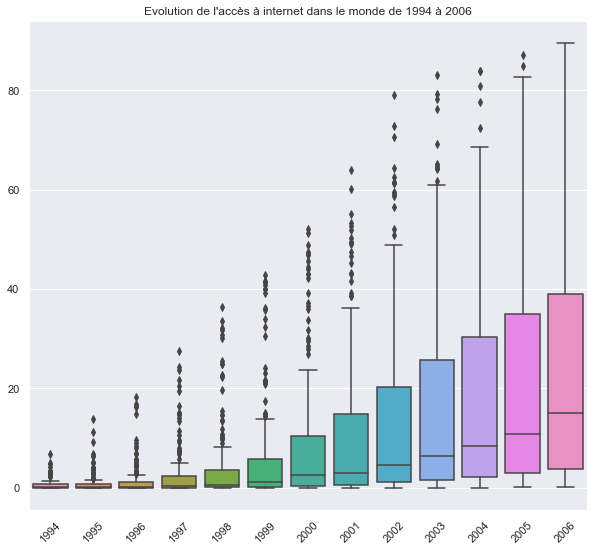

In [90]:
plt.figure(figsize=(10,9))
sns.set()
data_utile = Accenet.loc[:,'1994':'2006']
ax = sns.boxplot(data = data_utile)
plt.title("Evolution de l'accès à internet dans le monde de 1994 à 2006")
ax.set_xticklabels(data_utile.columns,rotation=45)
plt.show()

On peut remarquer l'augmentation du nombre de la population ayant accès à internet au fil des années, accentuant également les disparités entre pays...

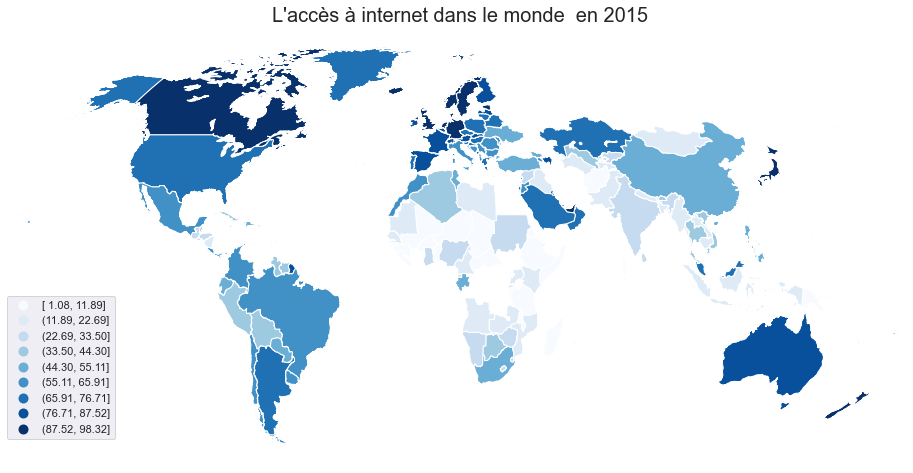

In [91]:
MapAccenet = Accenet.loc[:,['Country Name', 'Country Code','2015']] 
merged = gdf.merge(MapAccenet, left_on='ADM0_A3', right_on='Country Code')
merged
colors = 9
cmap = 'Blues'
figsize = (16, 10)
year = '2015'
cols = ['Country Name', 'Country Code', year]
title = 'L\'accès à internet dans le monde  en {}'.format(year)
imgfile = 'img/{}.png'.format(title)
ax = merged.dropna().plot(column=year, cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)
merged[merged.isna().any(axis=1)].plot(ax=ax)

ax.set_title(title, fontdict={'fontsize': 20}, loc='center')

ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])
ax.get_legend().set_bbox_to_anchor((.12, .4))
##ax.get_figure()

In [92]:
Acc = Accenet[["Region","Country Name", "2015"]]
Acc.sort_values(by = "2015", ascending = False)

,Region,Country Name,2015
23,North America,Bermuda,98.323610
80,Europe & Central Asia,Iceland,98.200000
102,Europe & Central Asia,Luxembourg,97.334100
4,Europe & Central Asia,Andorra,96.910000
129,Europe & Central Asia,Norway,96.810300
98,Europe & Central Asia,Liechtenstein,96.641195
46,Europe & Central Asia,Denmark,96.330500
19,Middle East & North Africa,Bahrain,93.478301
106,Europe & Central Asia,Monaco,93.363302
145,Middle East & North Africa,Qatar,92.884826


L'accées à internet s'est mondialisé au fil des années surtout dans l'Europe et l'asie centrale ou on peut retrouver: Le bermuda, l'irlanden le luxembourg, la norvège, Danemark Monaco.

### Indicateur PIB 

<Figure size 648x720 with 0 Axes>

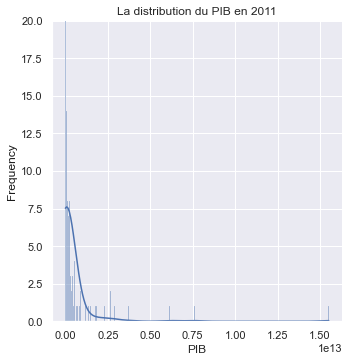

In [93]:
GPD = recup_indicateur(data,'country','GDP at market prices (current US$)')
GDPhist = GPD["2011"].dropna()
sns.set()
plt.figure(figsize = (9,10))
sns.displot(GDPhist, kde= True)
plt.title("La distribution du PIB en 2011")
plt.ylim(0,20)
plt.xlabel('PIB')
plt.ylabel('Frequency', c='k')
plt.show()

In [94]:
skew(GDPhist)

7.862274040524041

In [95]:
kurtosis(GDPhist)

73.2118022783331

La distribution est presque complètement verticale au vu du nombre élevé de la mesure d'applatissement. La distribution possède une queue trés a droite avec une mesure d'asymétrie tres positive.

In [105]:
GDPtris = GPD[['Region', 'Country Name', '2011']]
GDPtri = GDPtri.sort_values(by = "2011", ascending = False)
GDPtri

,Region,Country Name,2011
181,North America,United States,1.551793e+13
34,East Asia & Pacific,China,7.572554e+12
86,East Asia & Pacific,Japan,6.157460e+12
44,Europe & Central Asia,Germany,3.757698e+12
57,Europe & Central Asia,France,2.862680e+12
59,Europe & Central Asia,United Kingdom,2.619700e+12
25,Latin America & Caribbean,Brazil,2.616202e+12
83,Europe & Central Asia,Italy,2.276292e+12
78,South Asia,India,1.823050e+12
30,North America,Canada,1.788648e+12


In [97]:
PaysPrem = GDPtri.head(10)
PaysPrem

,Region,Country Name,2011
181,North America,United States,1.551793e+13
34,East Asia & Pacific,China,7.572554e+12
86,East Asia & Pacific,Japan,6.157460e+12
44,Europe & Central Asia,Germany,3.757698e+12
57,Europe & Central Asia,France,2.862680e+12
59,Europe & Central Asia,United Kingdom,2.619700e+12
25,Latin America & Caribbean,Brazil,2.616202e+12
83,Europe & Central Asia,Italy,2.276292e+12
78,South Asia,India,1.823050e+12
30,North America,Canada,1.788648e+12


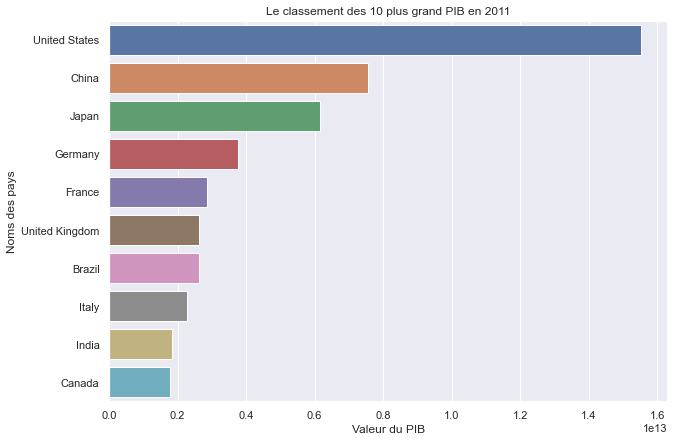

In [98]:
PaysPrem = GDPtri.head(10)
plt.figure(figsize = (10,7))
sns.barplot(data = PaysPrem, x="2011", y = "Country Name")
plt.xlabel("Valeur du PIB")
plt.ylabel("Noms des pays")
plt.title("Le classement des 10 plus grand PIB en 2011")
plt.show()

On remarque que les pays présentant un PIB élévée sont : Les Etats Unis, la Chine, Le Japon, l'Allemagne et la France suivi de le royaume unis. 

In [99]:
donneesnum = GPD.drop(['Country Code','Region','Country Name','Indicator Name'],axis=1)
GPD['MEAN'] = donneesnum.mean(axis=1)
GPD['MEDIAN'] = donneesnum.median(axis=1)
GPD['STD'] = donneesnum.std(axis=1)
GPD['VARIANCE'] = donneesnum.var(axis=1)
GPD['CHANGE'] = 100.0 * ((donneesnum['2015'] - donneesnum['2000'])/donneesnum['2000'])

GPD['SKEWNESS'] = donneesnum.skew(axis=1)
GPD['KURTOSIS'] = donneesnum.kurtosis(axis=1)

In [100]:
colIdx = ['Country Code','Region','Country Name','MEAN','MEDIAN','STD','VARIANCE','CHANGE']
GPDByRegion = GPD[colIdx].groupby(['Region']).mean()
GPDByRegion.head()

,MEAN,MEDIAN,STD,VARIANCE,CHANGE
Region,,,,,
East Asia & Pacific,2.147461e+11,1.719514e+11,2.068724e+11,4.593313e+23,313.889002
Europe & Central Asia,1.885297e+11,1.726745e+11,1.273888e+11,7.893266e+22,249.078043
Latin America & Caribbean,5.894702e+10,4.023091e+10,5.296314e+10,2.294819e+22,180.336128
Middle East & North Africa,5.042160e+10,3.204796e+10,4.567760e+10,4.979796e+21,245.687368
North America,2.931710e+12,2.491435e+12,1.993208e+12,9.934638e+24,92.690083


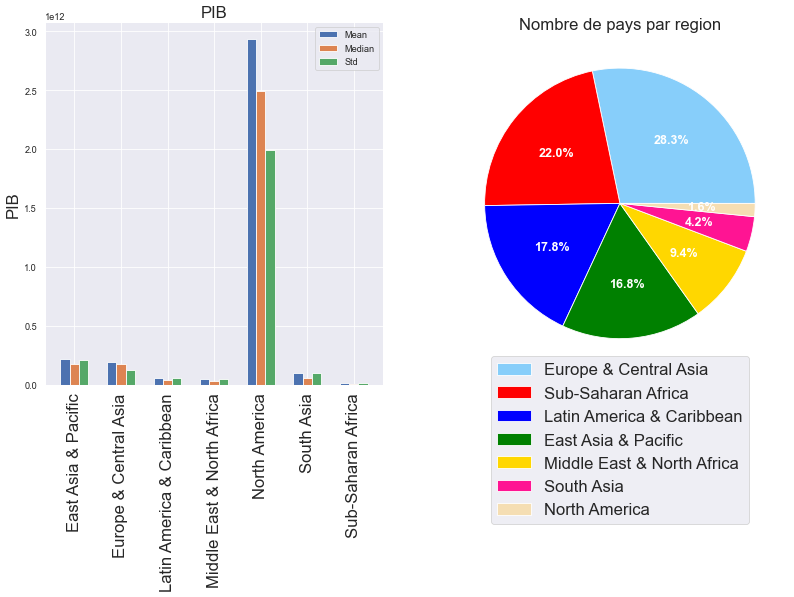

In [112]:
data = GPDByRegion[['MEAN','MEDIAN','STD']]

width = 0.2
x = np.arange(len(data.index))

fig = plt.figure(figsize=(16, 8), dpi= 60, facecolor='w', edgecolor='k')

ax1 = plt.subplot(1,2, 1)

bar1 = ax1.bar(x - width,data['MEAN'].values,width,label='Mean')
bar2 = ax1.bar(x,data['MEDIAN'].values,width,label='Median')
bar3 = ax1.bar(x + width,data['STD'].values,width,label='Std')

ax1.set_ylabel('PIB',fontsize=20)
ax1.set_title('PIB',fontsize=20)
ax1.set_xticks(x)
ax1.set_xticklabels(data.index,rotation=90,fontsize=20)
ax1.legend()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','deeppink','wheat']

ax2 = plt.subplot(1,2, 2)

wedges, texts, autotexts = ax2.pie(GPD['Region'].value_counts(),
                                   autopct=lambda pct: func(pct, GPD['Region'].value_counts())
                                   ,colors=colors,textprops=dict(color="w"))

ax2.legend(wedges, GPD['Region'].value_counts().index,
          loc="center",
          fontsize = 20,
          bbox_to_anchor=(0.25, -0.7, 0.5, 1))
ax2.set_title('Nombre de pays par region', fontsize = 20)

plt.setp(autotexts, size=15, weight="bold")

plt.show()

### Indicateur dépenses pour l'éducation effectuées par le gouvernement sur les dépenses totales en %

In [122]:
DepensesGovEdu = recup_indicateur(data,'country','Expenditure on education as % of total government expenditure (%)') 

In [123]:
TRIDepensesGovEdu = DepensesGovEdu[["Region","Country Name","2011"]]
TRIDepensesGovEdu = TRIDepensesGovEdu.sort_values(by = "2011", ascending = False)
TRIDepensesGovEdu

,Region,Country Name,2011
55,Sub-Saharan Africa,Ghana,29.994640
48,Sub-Saharan Africa,Ethiopia,29.674431
125,Latin America & Caribbean,Paraguay,23.297741
35,Latin America & Caribbean,Costa Rica,23.009621
146,East Asia & Pacific,Thailand,22.630239
141,Sub-Saharan Africa,Swaziland,22.333929
96,Europe & Central Asia,Moldova,21.915880
0,Latin America & Caribbean,Aruba,21.745461
110,Sub-Saharan Africa,Niger,21.675810
33,Sub-Saharan Africa,Comoros,21.414869


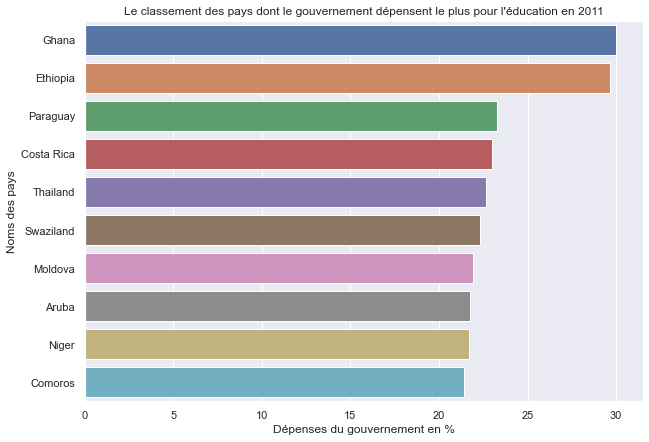

In [124]:
PaysPrem = TRIDepensesGovEdu.head(10)
plt.figure(figsize = (10,7))
sns.barplot(data = PaysPrem, x="2011", y = "Country Name")
plt.xlabel("Dépenses du gouvernement en %")
plt.ylabel("Noms des pays")
plt.title("Le classement des pays dont le gouvernement dépensent le plus pour l'éducation en 2011")
plt.show()

En première position, le Ghana puis l'Ethiopie, le Paraguay, le Costa Rica, la thailande.
On peut remarquer que les gouvernements qui dépensent le plus dans l'éducation ne sont pas forcéments les gouvernements de pays avec un gros PIB et un haut revenu

### Indicateur dépenses du gouvernement sur l'éducation en pourcentage par rapport au PIB

In [125]:
DepGovEduPIB = recup_indicateur(data,"Country","Government expenditure on education as % of GDP (%)")
DEG = DepGovEduPIB[["Region", "Country Name", "2011"]]


In [126]:
DeG = DEG.sort_values(by = "2011", ascending = False)
DeG

,Region,Country Name,2011
160,East Asia & Pacific,Timor-Leste,9.25706
43,Europe & Central Asia,Denmark,8.56300
101,Europe & Central Asia,Moldova,8.55970
57,Sub-Saharan Africa,Ghana,8.14097
107,Middle East & North Africa,Malta,7.75177
74,Europe & Central Asia,Iceland,7.04963
122,East Asia & Pacific,New Zealand,6.95138
22,Latin America & Caribbean,Bolivia,6.89808
82,Europe & Central Asia,Kyrgyz Republic,6.79036
151,Sub-Saharan Africa,Swaziland,6.73145


9% du PIB est utilisé pour l'éducation dans le Timor-Leste, un pays de l'Asie de l'est et du Pacifique pui 8.5 % du PIB pour l'éduction au Danemark. En troisème position, le Ghana avec 8.1 % puis Malte avec 7.7 % du PIB

### Indicateur PIB/habitant

In [127]:
GDPHab = recup_indicateur(data, "country","GDP per capita (current US$)")
GDPHab.isna().sum()

Country Code       0
Region             0
Income Group       0
Country Name       0
Indicator Name     0
1970              77
1971              75
1972              75
1973              75
1974              75
1975              73
1976              72
1977              68
1978              69
1979              68
1980              58
1981              55
1982              54
1983              54
1984              52
1985              49
1986              49
1987              45
1988              43
1989              42
1990              27
1991              26
1992              26
1993              25
1994              22
1995              13
1996              12
1997              13
1998              12
1999              11
2000               7
2001               8
2002               5
2003               5
2004               4
2005               4
2006               3
2007               4
2008               6
2009               6
2010               6
2011               6
2012         

In [128]:
GPH = GDPHab[["Region", "Country Name", "2011"]]
GPH.sort_values(by = "2011", ascending = False)

,Region,Country Name,2011
107,Europe & Central Asia,Monaco,162009.877819
99,Europe & Central Asia,Liechtenstein,158283.076260
103,Europe & Central Asia,Luxembourg,115761.507705
130,Europe & Central Asia,Norway,100711.224781
31,Europe & Central Asia,Switzerland,88415.628061
23,North America,Bermuda,85973.158416
146,Middle East & North Africa,Qatar,85948.070456
77,Europe & Central Asia,Isle of Man,76055.542096
105,East Asia & Pacific,"Macao SAR, China",66813.349741
156,Europe & Central Asia,San Marino,65213.618990


Sachant que le PIB/hab ne prend pas en compte les inégalités de richesse dans un pays, les resultats sont de l'ordre de l'approximation. En première position Monaco puis Liechtenstein(entre la suisse et l'autriche), le lyxembourg puis la norvège et la suisse.

## Construction d'une métrique de priorisation des pays et conclusion

In [129]:
#Je renomme les colonnes
GDPtri.rename(columns={'2011': 'PIB'}, inplace=True)
TriPopJeune.rename(columns={'2015': 'Population jeune'}, inplace=True)
TriPopOrdi.rename(columns={'2006': 'Ordinateur personnel(100 personnes)'}, inplace=True)
Acc.rename(columns={"2015": "Accès à internet(100 personnes)"}, inplace=True)
NTJ.rename(columns = { "Lycee 2007":"Inscrit Lycée" , "Terti 2007":"Inscrit dans le tertiaire"}, inplace=True)

C:\Users\agar.blohorn\anaconda3\envs\geo_env\lib\site-packages\pandas\core\frame.py:4295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [130]:
#je fusionne les datframes entre eux pour en faire un tableau
df1 = GDPtri.merge(TriPopJeune[["Country Name", "Population jeune"]], on = "Country Name", how = "outer")
df2 = df1.merge(TriPopOrdi[["Country Name", "Ordinateur personnel(100 personnes)"]],on = "Country Name",how = "outer")
df3 = df2.merge(Acc[["Country Name", "Accès à internet(100 personnes)"]],on = "Country Name",how = "outer")
df4 = df3.merge(NTJ[["Country Name", "Inscrit Lycée","Inscrit dans le tertiaire"]], on = "Country Name" ,how = "outer")

In [131]:
df4.head()

,Region,Country Name,PIB,Population jeune,Ordinateur personnel(100 personnes),Accès à internet(100 personnes),Inscrit Lycée,Inscrit dans le tertiaire
0,North America,United States,1.551793e+13,45147517.0,79.915488,74.554202,11729600.0,17758870.0
1,East Asia & Pacific,China,7.572554e+12,197026759.0,5.588372,50.300000,42175612.0,25346280.0
2,East Asia & Pacific,Japan,6.157460e+12,12157426.0,NaN,91.058028,3794132.0,4032625.0
3,Europe & Central Asia,Germany,3.757698e+12,8682394.0,64.485079,87.589800,NaN,NaN
4,Europe & Central Asia,France,2.862680e+12,7567872.0,64.677574,84.694500,2686940.0,2179505.0


In [132]:
#DataFrame.rank(axis=0, method=’average’, numeric_only=None, na_option=’keep’, ascending=True, pct=False)
df4['Rang_Pib'] = df3['PIB'].rank(na_option='bottom', ascending=False)
df4['Rang_Jeune'] = df3['Population jeune'].rank(na_option='bottom', ascending=False)
df4['Rang_Ordi'] = df3['Ordinateur personnel(100 personnes)'].rank(na_option='bottom', ascending=False)
df4['Rang_internet'] = df3['Accès à internet(100 personnes)'].rank(na_option='bottom', ascending=False)
df4['Rang_Lycee_inscrit'] = df4['Inscrit Lycée'].rank(na_option='bottom', ascending=False)
df4['Rang_Tertiaire_inscrit'] = df4['Inscrit dans le tertiaire'].rank(na_option='bottom', ascending=False)
df4["Rang_Total"] = df4['Rang_Pib'] + df4['Rang_Jeune']  + df4['Rang_Ordi'] + df4['Rang_internet'] + df4['Rang_Lycee_inscrit'] + df4['Rang_Tertiaire_inscrit']
df4["Métrique"] = 1-(df4["Rang_Total"]/max(df4["Rang_Total"]))
df4.head(5)

,Region,Country Name,PIB,Population jeune,Ordinateur personnel(100 personnes),Accès à internet(100 personnes),Inscrit Lycée,Inscrit dans le tertiaire,Rang_Pib,Rang_Jeune,Rang_Ordi,Rang_internet,Rang_Lycee_inscrit,Rang_Tertiaire_inscrit,Rang_Total,Métrique
0,North America,United States,1.551793e+13,45147517.0,79.915488,74.554202,11729600.0,17758870.0,1.0,3.0,7.0,43.0,3.0,2.0,59.0,0.941029
1,East Asia & Pacific,China,7.572554e+12,197026759.0,5.588372,50.300000,42175612.0,25346280.0,2.0,2.0,62.0,93.0,1.0,1.0,161.0,0.839080
2,East Asia & Pacific,Japan,6.157460e+12,12157426.0,NaN,91.058028,3794132.0,4032625.0,3.0,14.0,143.0,13.0,7.0,5.0,185.0,0.815092
3,Europe & Central Asia,Germany,3.757698e+12,8682394.0,64.485079,87.589800,NaN,NaN,4.0,22.0,13.0,20.0,150.0,150.0,359.0,0.641179
4,Europe & Central Asia,France,2.862680e+12,7567872.0,64.677574,84.694500,2686940.0,2179505.0,5.0,25.0,12.0,25.0,13.0,13.0,93.0,0.907046


In [133]:
df4['Rang_Total'].describe()

count     193.000000
mean      582.000000
std       233.549697
min        59.000000
25%       383.000000
50%       607.000000
75%       765.000000
max      1000.500000
Name: Rang_Total, dtype: float64

In [134]:
df4 = df4.sort_values(by = "Rang_Total", ascending = True)

Text(0.5, 1.0, "Les 10 premiers pays à prioriser pour l'implantation d'academy")

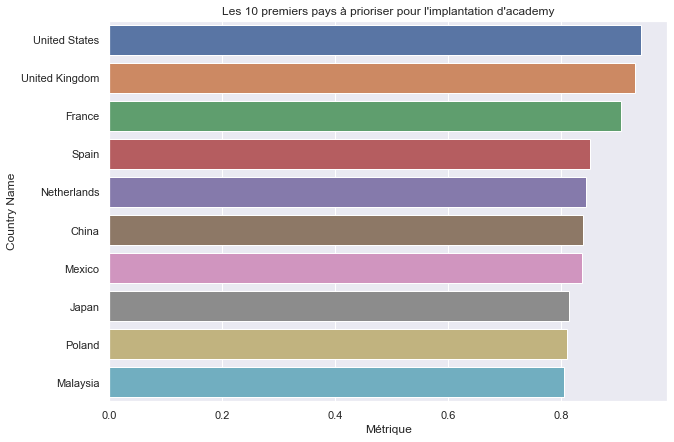

In [135]:
plt.figure(figsize = (10,7))
sns.set()
sns.barplot(data = df4.head(10), x = "Métrique", y = "Country Name")
plt.title("Les 10 premiers pays à prioriser pour l'implantation d'academy")

Les Etats Unis obtienne la première place du classement et deviens l'un des pays à prioriser pour l'implantation de Academy.
En deuxieme et troisème place, respectivement, le Royaume Unis et la France puis la France et l'espagne et la Norvège puis la Chine avec un PIB conséquent, en sachant que le nombre de diplômé en Chine fait partis des premiers dans le monde, la chine est clairement prioritaire également. 
Les pays dont le PIB sont importants entrainent automatiquement l'accès à internet et une population dans la capacité d'avoir un ordinateur personnel.

In [136]:
Corr = df4[["PIB", "Ordinateur personnel(100 personnes)", "Accès à internet(100 personnes)"]]

<Figure size 720x504 with 0 Axes>

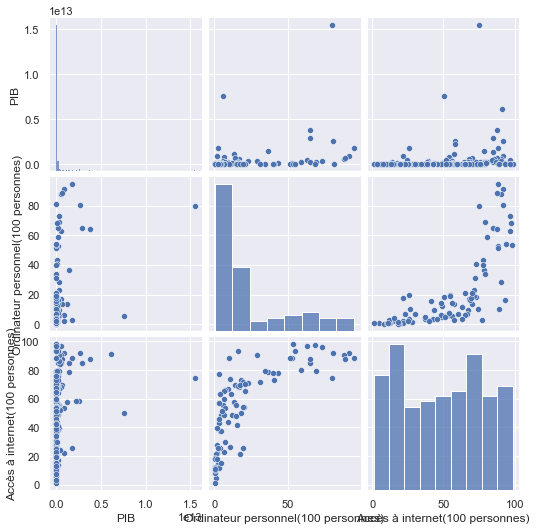

In [137]:
plt.figure(figsize= (10,7))
sns.pairplot(Corr)
plt.show()

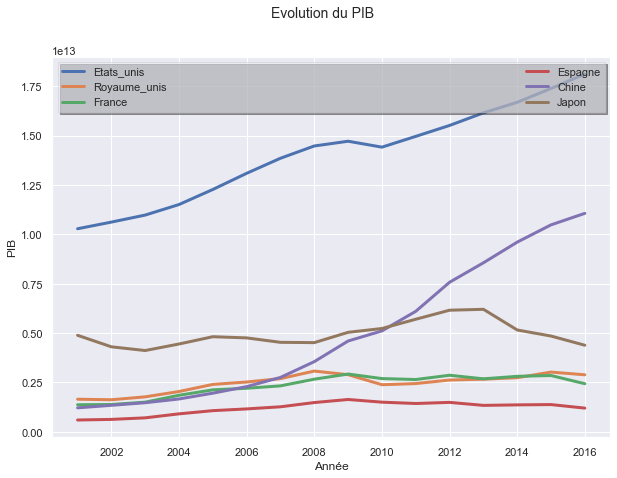

In [139]:

fig = plt.figure(figsize=(10, 7))
fig.suptitle("Evolution du PIB", fontsize  = 14)
Date_Deb = datetime.strptime('2000-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2015-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

Etats_unis   = GPD[GPD['Country Code'] == 'USA'].loc[:,'2000':'2015']
Royaume_unis = GPD[GPD['Country Code'] == 'GBR'].loc[:,'2000':'2015']
France       = GPD[GPD['Country Code'] == 'FRA'].loc[:,'2000':'2015']
Espagne      = GPD[GPD['Country Code'] == 'ESP'].loc[:,'2000':'2015']
Chine        = GPD[GPD['Country Code'] == 'CHN'].loc[:,'2000':'2015']
Japon        = GPD[GPD['Country Code'] == 'JPN'].loc[:,'2000':'2015']

plt.plot(annees_ref,Etats_unis.T,linewidth = 3.0, label='Etats_unis')
plt.plot(annees_ref,Royaume_unis.T,linewidth = 3.0, label='Royaume_unis')

plt.plot(annees_ref,France.T,linewidth = 3.0, label='France')
plt.plot(annees_ref,Espagne.T,linewidth = 3.0, label='Espagne')

plt.plot(annees_ref,Chine.T,linewidth = 3.0, label='Chine')
plt.plot(annees_ref,Japon.T,linewidth = 3.0, label='Japon')

plt.xlabel('Année')
plt.ylabel('PIB')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()




On remarque sur ce graphique qu'au fil des années, le PIB évolue pour la plupart de ces pays dans le bon sens ou se stabilise dans le temps.

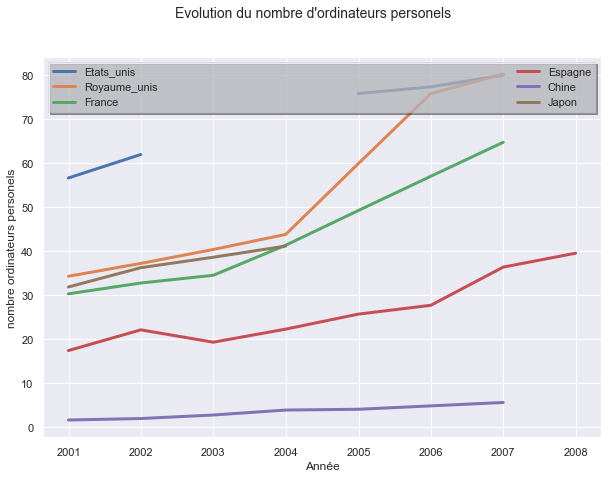

In [140]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Evolution du nombre d'ordinateurs personels", fontsize  = 14)
Date_Deb = datetime.strptime('2000-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2009-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

Etats_unis   = PopulationOrdinateur[PopulationOrdinateur['Country Code'] == 'USA'].loc[:,'2000':'2009']
Royaume_unis = PopulationOrdinateur[PopulationOrdinateur['Country Code'] == 'GBR'].loc[:,'2000':'2009']
France       = PopulationOrdinateur[PopulationOrdinateur['Country Code'] == 'FRA'].loc[:,'2000':'2009']
Espagne      = PopulationOrdinateur[PopulationOrdinateur['Country Code'] == 'ESP'].loc[:,'2000':'2009']
Chine        = PopulationOrdinateur[PopulationOrdinateur['Country Code'] == 'CHN'].loc[:,'2000':'2009']
Japon        = PopulationOrdinateur[PopulationOrdinateur['Country Code'] == 'JPN'].loc[:,'2000':'2009']

plt.plot(annees_ref,Etats_unis.T,linewidth = 3.0, label='Etats_unis')
plt.plot(annees_ref,Royaume_unis.T,linewidth = 3.0, label='Royaume_unis')

plt.plot(annees_ref,France.T,linewidth = 3.0, label='France')
plt.plot(annees_ref,Espagne.T,linewidth = 3.0, label='Espagne')

plt.plot(annees_ref,Chine.T,linewidth = 3.0, label='Chine')
plt.plot(annees_ref,Japon.T,linewidth = 3.0, label='Japon')

plt.xlabel('Année')
plt.ylabel('nombre ordinateurs personels')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

Le nombre d'ordinateurs personnels augmentent au fil des années pour ces pays avec un PIB élevé

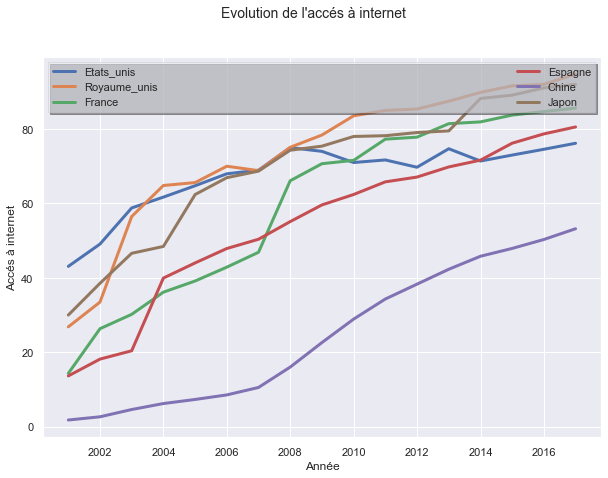

In [141]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Evolution de l'accés à internet", fontsize  = 14)
Date_Deb = datetime.strptime('2000-01-01','%Y-%m-%d')
Date_Fin= datetime.strptime('2016-12-31','%Y-%m-%d')
annees_ref = pd.date_range(Date_Deb,Date_Fin,freq='Y')

Etats_unis   = Accenet[Accenet['Country Code'] == 'USA'].loc[:,'2000':'2016']
Royaume_unis = Accenet[Accenet['Country Code'] == 'GBR'].loc[:,'2000':'2016']
France       = Accenet[Accenet['Country Code'] == 'FRA'].loc[:,'2000':'2016']
Espagne      = Accenet[Accenet['Country Code'] == 'ESP'].loc[:,'2000':'2016']
Chine        = Accenet[Accenet['Country Code'] == 'CHN'].loc[:,'2000':'2016']
Japon        = Accenet[Accenet['Country Code'] == 'JPN'].loc[:,'2000':'2016']

plt.plot(annees_ref,Etats_unis.T,linewidth = 3.0, label='Etats_unis')
plt.plot(annees_ref,Royaume_unis.T,linewidth = 3.0, label='Royaume_unis')

plt.plot(annees_ref,France.T,linewidth = 3.0, label='France')
plt.plot(annees_ref,Espagne.T,linewidth = 3.0, label='Espagne')

plt.plot(annees_ref,Chine.T,linewidth = 3.0, label='Chine')
plt.plot(annees_ref,Japon.T,linewidth = 3.0, label='Japon')

plt.xlabel('Année')
plt.ylabel('Accés à internet')

leg = plt.legend(loc='upper center', ncol=2, mode="expand", shadow=True, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

On remarque une haute augmentation de l'accés internet au fil des années ce qui nous laisse supposer une stabilité du point de vue de la connectivité

On peut conclure que les pays avec un fort PIB comme les Etats_unis, la Chine, le Royaume_unis, la France ont accés à internet et la population peut se permettre d'avoir un ordinateur pour pouvoir étudier via le net. 
La Chine fais parti des pays les plus jeunes au monde et fais partis également du top 10 du taux de diplomés le plus élevé, ce qui laisse à supposer une forte demande de formations et de cours en ligne dans ce pays. 
